## Model Selection
* Two ways to train linear regression: closed form equation and iterative optimization
* Variants of gradient descent: batch, mini-batch, stochastic
* Polynomial regression, logistic regression, and softmax regression

## Linear Regression
$$
\hat{y} = \boldsymbol{\theta}\cdot\boldsymbol{x}
$$

where $\boldsymbol{\theta}$ is the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.

and where $\boldsymbol{x}$ is the instance's feature vector containing $x_0$ to $x_n$, with $x_0=1$.

Note: vectors are often represented as column vectors, so it can be rewritten as $\hat{y} = \boldsymbol{\theta}^T\boldsymbol{x}$

We usually use the *root mean squared error* to measure the performance of a regression model. To fit the linear regression model, we seek to minimize the RMSE. In practice, it is simpler to minimize the *mean squared error* than the RSME since MSE is easier to compute and has useful differentiation properties and gives the same results.

$$
MSE(\boldsymbol{X}, h_\theta) = \frac{1}{m} \sum^{m}_{i=1}{(\boldsymbol{\theta}^T\boldsymbol{x}^{(i)} - y^{(i)})^2}
$$

#### Normal Equation
$$
\boldsymbol{\hat{\theta}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}
$$

Another numerical method for solving linear least squares is using [QR decomposition](https://en.wikipedia.org/wiki/Numerical_methods_for_linear_least_squares) or [SVD](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse#Singular_value_decomposition_(SVD).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

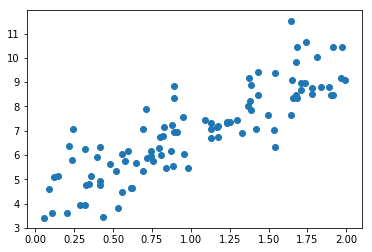

In [2]:
plt.scatter(X,y)
plt.show()

In [3]:
X_b = np.c_[np.ones((100,1)), X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best) # close enough to 4 and 3

[[4.10018083]
 [2.8012127 ]]


In [4]:
X_new = np.array([[0], [2]]) # two new instances
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.10018083]
 [9.70260622]]


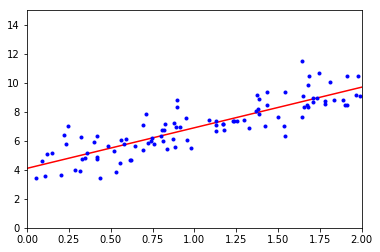

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.10018083] [[2.8012127]]


array([[4.10018083],
       [9.70260622]])

`LinearRegression` computes $\hat{\theta} = \boldsymbol{X}^+\boldsymbol{y}$, where $\boldsymbol{X}^+$ is the pseudoinverse of $\boldsymbol{X}$. The pseudoinverse is computed using SVD.

The pseudoinverse can be computed regardless of whether $\boldsymbol{X}^T\boldsymbol{X}$ is singular.

Recall that SVD decomposes $\boldsymbol{X} = \boldsymbol{U}\boldsymbol{\Sigma}\boldsymbol{V}^T$ and the pseudoinverse can be computed as $\boldsymbol{X}^+ = \boldsymbol{V}\boldsymbol{\Sigma}^+\boldsymbol{U}^T$, where $\sigma_{ij}^+ = \sigma_{i,j}^{-1}$ if $\sigma_{i,j} > \epsilon$, else $\sigma_{i,j}=0$.

Computing the pseudoinverse is $O(n^2)$ to $O(n^3)$ where $n$ is the number of features. However, it is $O(m)$, where $m$ is the number of instances.

#### Batch Gradient Descent
1. Initialize $\boldsymbol{\hat{\theta}}$ with some weights
2. Compute the gradient, $\frac{df(\boldsymbol{\hat{\theta}})}{d\boldsymbol{\hat{\theta}}}$, of $f(\boldsymbol{\hat{\theta}})$ with respect to $\boldsymbol{\hat{\theta}}$
3. $\boldsymbol{\hat{\theta}} = \boldsymbol{\hat{\theta}} - \alpha \frac{df(\boldsymbol{\hat{\theta}})}{d\boldsymbol{\hat{\theta}}}$
4. Repeat 2 and 3 until convergence

Need to be careful when picking $\alpha$. If it is too high, then the algorithm diverges. If it's too small, then the algorithm will take a long time to converge.

Depending on the function we are optimizing, we may or may not converge to a local minimum. If the function is *convex*, then it will converge to a global minimum.

Feature scaling is important for gradient descent, because if the features are of not the same scale, then the function is stretched out in some dimensions which makes convergence difficult.

In the case of MSE, the gradient is
$$
\triangledown MSE(\boldsymbol{\hat{\theta}}) = \frac{2}{m}\boldsymbol{X}^T(\boldsymbol{X}{\boldsymbol{\hat{\theta}}} - \boldsymbol{y})
$$

** We can find a good learning rate through grid or random search. We can simply eliminate models that take too long to converge. **

#### Stochastic Gradient Descent
Instead of using every instance in the training set, we can use a random instance to compute the gradient. But this will cause the cost function to bounce up and down and never settle down around the minimum. This may help with escaping local minimums. We can also gradually reduce the learning rate over time (*learning schedule*).

#### Mini-batch Gradient Descent
Compute the gradient on small random *mini-batches* of instances. This combines the best of both worlds.

## Polynomial Regression
`PolynomialFeatures` can be used to model nonlinear data by adding all combinations of features up to a given degree.

For example, if there were features `a` and `b` with `degree=3`, then the combinations of features generated are: `a^2`, `a^3`, `b^2`, `b^3`, `ab`, `a^2b`, `ab^2`.

In general, `PolynomialFeatures(degree=d)` transforms an array containing `n` features into an array containing $\frac{(n+d)!}{d!n!}$ features.

## Learning Curves
* Previously, we can use cross-validation metrics to evaluate a model.
* Another option is using *learning curves*, which are plots of the model's performance on the training set and the validation set as a function of the training set size (or training iteration).

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    # train models with 1 to m instances in training set
    # then evaluate on hold out data
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()

In [8]:
np.random.seed(0)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

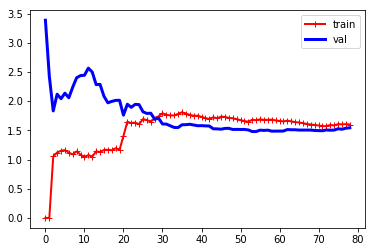

In [9]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

* When the training first begins, with 2 data points, the MSE is 0, but as we add more, the MSE goes up due to the noise and the nonlinearity of the data
* Eventually, the training error plateaus because adding more instances do not help the model

* The validation starts off high because it is initially incapable of generalize from a small training set
* Eventually, the validation error plateaus close to the training error because the model fails to capture the non-linearity of the data

**Underfitting requires the use of more complex models. The above shows that getting more trainining data does not help**

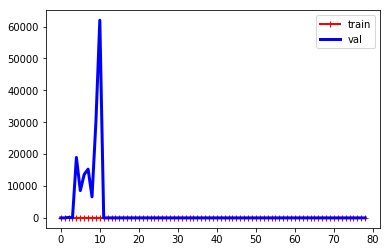

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_reg, X, y)

* There is a large gap between the training and validation error where the training error is much lower than the validation error, indicating there is significant overfitting

**Overfitting can be addressed by getting more training data such that the validation error reaches the training error**

## Regularized Linear Models
* Constrain the model such that there are fewer degrees of freedom, so it is more difficult to overfit the data
* Regularization term is only added to the cost function during training. Once training is done and you want to evaluate the model's performance using the unregularized performance measure.

#### Ridge Regression
$$
J(\boldsymbol{\theta}) = f(\boldsymbol{\theta}) + \alpha\frac{1}{2}\sum^{n}_{i=1}{\theta_i^2}
$$

A larger $\alpha$ leads to a stronger regularization effect, where the weights are closer to zero.

The bias term $\theta_0$ is not regularize because the bias term does not contribute to the curvature of the model since it is only an additive term. 

The $\frac{1}{2}$ makes the gradient nicer to compute, since the 2's cancel out.

**It's important to scale the data before performing ridge regression because it is sentive to the scale of input features**

In [11]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky") # closed form equation; see doc for more solvers
ridge_reg.fit(X,y)
print(ridge_reg.predict([[1.5]]))

[[5.00675066]]


In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y)
print(sgd_reg.predict([[1.5]]))

[3.92958064]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Lasso Regression
$$
J(\boldsymbol{\theta}) = f(\boldsymbol{\theta}) + \alpha\frac{1}{2}\sum^{n}_{i=1}{|\theta_i|}
$$

Lasso regression tends to completely eliminate the weights of the least important features, so it automatically performs feature selection and outputs a sparse model.

It is not differentiable at $\theta_i = 0$, but we can use the [subgradient](https://en.wikipedia.org/wiki/Subderivative).

#### Elastic Net
* Combines both ridge and lasso, with a mix ratio $r$ that controls the weight of the two regularization term

$$
J(\boldsymbol{\theta}) = f(\boldsymbol{\theta}) + r\alpha\frac{1}{2}\sum^{n}_{i=1}{|\theta_i|} + \frac{1-r}{2}\alpha\frac{1}{2}\sum^{n}_{i=1}{\theta_i^2}
$$

In general, Ridge > Elastic > Lasso, in terms of preference.

In [13]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
print(elastic_net.predict([[1.5]]))

[4.96011063]


#### Early Stopping
* Regularization for iterative learning algorithms such as gradient descent
* Idea: Stop training as soon as validation error reaches the minimum (e.g. when it stops improving after some time)

In [14]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# when warm_start=True, whenever fit() is called, it continues
# training where it left off
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

min_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## Logistic Regression
* Used to estimate the probability an instance belongs to a particular class
* Sigmoid function maps value to [0,1]
* Cost function is:
$$
J(\boldsymbol\theta) = -\frac{1}{m}\sum^{m}_{i=1}{[y^{(i)}log(p^{(i)}) + (1-y^{(i)})log(1-p^{(i)})]}
$$
* Solved using iterative methods such as GD
* Can be regularized using lasso or ridge or elastic net

#### Decision Boundaries

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:,3:] # get petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0
print(list(iris.keys()))

['data', 'target', 'target_names', 'DESCR', 'feature_names']


In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

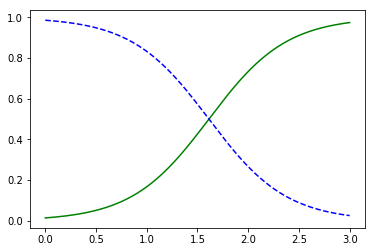

In [17]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica")
plt.show()

Around 1.5 cm, the classifier is unsure about the class (~0.5 probability), whereas if it's 2 cm, it is highly confident it's a Virginica.

## Softmax Regression
* Generalizes to support more than two classes without having to train multiple binary classifiers
* First computes the score $s_k(\boldsymbol{x})$ for each class $k$
$$
s_k(\boldsymbol{x}) = (\boldsymbol{\theta}^{(k)})^T\boldsymbol{x}
$$
* Then normalizes the scores to create a probability distribution over all the classes using the softmax function
$$
p_k = \frac{exp(s_k(\boldsymbol{x}))}{\sum^{K}_{j=1}{s_j(\boldsymbol{x})}}
$$
* The prediction is where $p_k$ is maximized (ie the class $k$)
* It is multiclass, not multioutput, so classses must be mutually exclusive
* The cross entropy cost function:
$$
J(\Theta) = \frac{-1}{m}\sum^{m}_{i=1}{\sum^{K}_{k=1}{y^{(i)}_klog(p^{(i)}_k)}}
$$

The cross entropy cost function is used to measure how well a set of estimate class probabilities match the target classes.

In [18]:
X = iris["data"][:, (2,3)] # petal length, width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs")
softmax_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
print(softmax_reg.predict([[5,2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[2.42794737e-04 2.14966717e-01 7.84790488e-01]]


#### Exercises
1. Use GD since the number of features $n$ is high, and computing the closed form solution would be $O(n^3)$.
2. Gradient descent suffers from features with different scales because the cost function is elongated in different dimensions, so convergence will take longer. For example, you may overstep and not step enough on some features simultaneously.
3. GD cannot get stuck in a local minima in logistic regression because the cost function is convex. However, when the data is linearly separable, it will not converge because there are an infinite number of solutions.
4. All GD algorithms converge provided the learning rate is small enough and the cost function is convex. However, SGD and MBGD will not converge as it will keep bouncing around the minimum.
5. When the validation error and training error are increasing during BGD, it is likely that the learning rate is too high. Otherwise, if it's only the validation error that increases, then the model is overfitting. 
6. When the validation error goes up, it is not always a good idea to immediately stop MBGD since if we go a little bit further, we may start improving again (and hopefully more). So we should save the model every so often.
7. SGD will reach the vicinity of the optimal solution the fastest because it is much faster to compute than BGD or MBGD. However, only BGD will converge, given a convex cost function. MBGD and SGD can get out of local minimums, however, if the learning rate is not slowly decreased, then they may not converge.
8. When there is a large gap between the training error and validation error for a polynomial regression model, we are overfitting because the training error is incredibly low, yet the validation error is high. To fix this, we can decrease the flexibility of the model, collect more training data, or regularize the model.
9. When we use ridge regression and both the training and validation error are almost equal and fairly high, we are most likely underfitting because the model isn't learning at all (by looking at the training error). We should decrease the regularization parameter so we don't penalize the model as much.
10. We should use ridge regression over plain linear regression because a regularized model performs better in validation and testing than a non-regularized model. We should pick lasso over ridge when we have to do feature selection or believe only a subset of coefficients are non-zero. We should pick elastic net over lasso since lasso may behave erratically when features are strongly correlated.
11. If we want to classify pictures as outdoor/indoor and daytime/nighttime, we should use two logistic regression classifiers since this is a multioutput problem.

In [51]:
# Implement BGD  with early stopping for softmax regression w/o sklearn
def softmax(score):
    exps = np.exp(score)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

def softmax_bgd(X_train, y_train, X_val, y_val, epochs=1000, eta=0.01):
    m = len(X_train)
    n_inputs = X_train.shape[1]
    n_outputs = y_train.shape[1]
    weights = np.random.randn(n_inputs, n_outputs)
    epsilon = 1e-7
    
    best_loss = np.infty
    for epoch in range(epochs):
        score = np.dot(X_train, weights)
        proba = softmax(score)
        loss = -np.mean(np.sum(y_train * np.log(proba + epsilon), axis=1))
        error = proba - y_train
        gradients = 1/m * X_train.T.dot(error)
        weights = weights - eta * gradients
        
        val_score = np.dot(X_val, weights)
        val_proba = softmax(val_score)
        val_loss = -np.mean(np.sum(y_val * np.log(val_proba + epsilon), axis=1))
        
        if epoch % 250 == 0:
            print(epoch, loss)
        
        if val_loss < best_loss:
            best_loss = val_loss
        else:
            print("Early stopping at", epoch)
            break
    
    return weights

In [52]:
X = iris["data"][:, (2,3)]
y = iris["target"]

X_with_bias = np.c_[np.ones([len(X), 1]), X]
np.random.seed(2042)

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

We need target class probabilities. Remember how we zero out the incorrect classes in the cost function since the true probability for the incorrect classses are zero.

In [53]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [54]:
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

In [56]:
weights = softmax_bgd(X_train, y_train_one_hot, 
                      X_valid, y_valid_one_hot,
                      epochs=5000)

0 6.101427811958398
250 0.8358884959290211
500 0.7488075774287956
750 0.6832719854790219
1000 0.6331479911051975
1250 0.5939457956211001
1500 0.5625483738473714
1750 0.5368239178693208
2000 0.5153078902553915
2250 0.49698013677402836
2500 0.4811172401710756
2750 0.46719631208290796
3000 0.45483217915207436
3250 0.44373592865591244
3500 0.4336871418864149
3750 0.42451498696487633
4000 0.4160851258158182
4250 0.40829049634025205
4500 0.4010447190157491
4750 0.3942773091647368


In [28]:
y_train.shape

(90,)